In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:

from roboflow import Roboflow
rf = Roboflow(api_key="9IPIvCptVezcgVNLGXIO")
project = rf.workspace("brad-dwyer").project("pothole-voxrl")
version = project.version(1)
dataset = version.download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-1 in coco:: 100%|██████████| 673/673 [00:00<00:00, 984.68it/s]


## **Importing libraries**

68
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


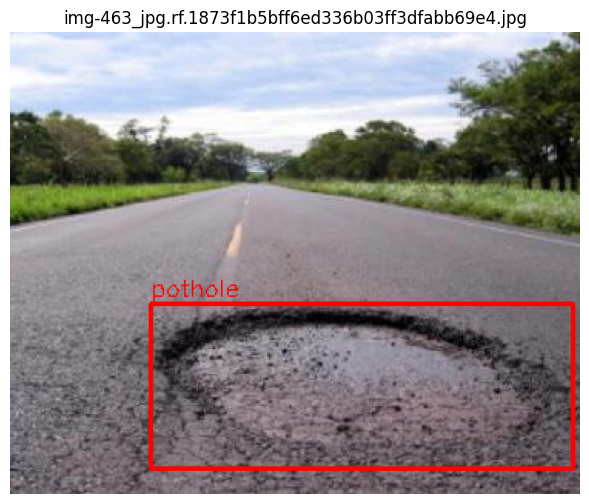

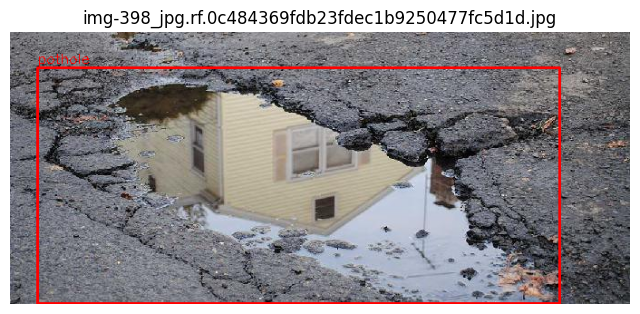

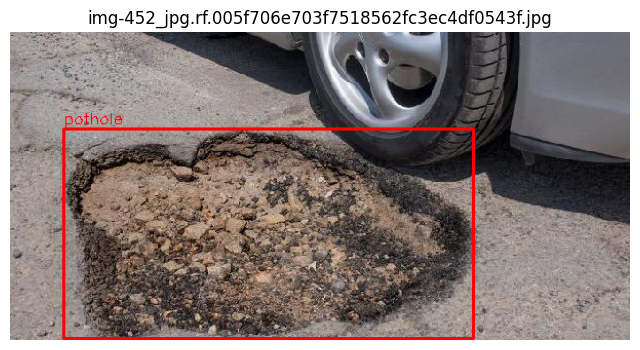

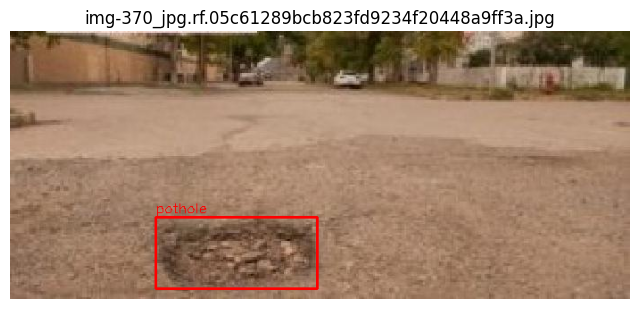

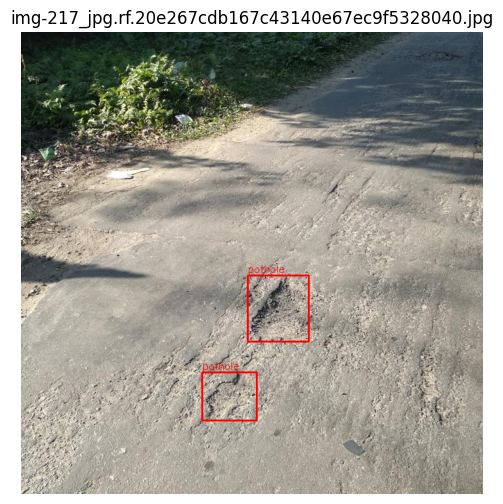

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# --- Configuration ---
coco_json_path = 'Pothole-1/test/_annotations.coco.json'  # Replace with your COCO JSON file
images_dir = 'Pothole-1/test'              # Replace with the path to your image folder

print(len(os.listdir(images_dir)))

# --- Load COCO Annotations ---
coco = COCO(coco_json_path)

# Get all image IDs
image_ids = coco.getImgIds()

# Display the first 5 images with bounding boxes
for img_id in image_ids[:5]:
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(images_dir, img_info['file_name'])

    # Load the image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load annotations (bounding boxes)
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)

    # Draw bounding boxes
    for ann in anns:
        x, y, w, h = ann['bbox']
        category_id = ann['category_id']
        category_name = coco.loadCats(category_id)[0]['name']

        # Draw rectangle
        cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)
        cv2.putText(image, category_name, (int(x), int(y - 5)), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (255, 0, 0), 1)

    # Show the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(img_info['file_name'])
    plt.show()


In [4]:
!pip install -q rfdetr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [7]:
from rfdetr import RFDETRBase

model = RFDETRBase()
history = []

def callback2(data):
    history.append(data)

model.callbacks["on_fit_epoch_end"].append(callback2)

model.train(
    dataset_dir="Pothole-1",
    epochs=5,
    batch_size=4,
    lr=1e-4
)


Loading pretrain weights


reinitializing your detection head with 2 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=2, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=4, weight_decay=0.0001, epochs=5, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads=16

Epoch: [0]  [ 0/29]  eta: 0:06:46  lr: 0.000100  class_error: 51.28  loss: 16.4201 (16.4201)  loss_ce: 0.6854 (0.6854)  loss_bbox: 1.6482 (1.6482)  loss_giou: 1.5937 (1.5937)  loss_ce_0: 0.5925 (0.5925)  loss_bbox_0: 1.8973 (1.8973)  loss_giou_0: 1.8191 (1.8191)  loss_ce_1: 0.7043 (0.7043)  loss_bbox_1: 1.6436 (1.6436)  loss_giou_1: 1.5869 (1.5869)  loss_ce_enc: 0.6316 (0.6316)  loss_bbox_enc: 1.8763 (1.8763)  loss_giou_enc: 1.7413 (1.7413)  loss_ce_unscaled: 0.6854 (0.6854)  class_error_unscaled: 51.2821 (51.2821)  loss_bbox_unscaled: 0.3296 (0.3296)  loss_giou_unscaled: 0.7968 (0.7968)  cardinality_error_unscaled: 2079.7500 (2079.7500)  loss_ce_0_unscaled: 0.5925 (0.5925)  loss_bbox_0_unscaled: 0.3795 (0.3795)  loss_giou_0_unscaled: 0.9096 (0.9096)  cardinality_error_0_unscaled: 218.7500 (218.7500)  loss_ce_1_unscaled: 0.7043 (0.7043)  loss_bbox_1_unscaled: 0.3287 (0.3287)  loss_giou_1_unscaled: 0.7934 (0.7934)  cardinality_error_1_unscaled: 814.2500 (814.2500)  loss_ce_enc_unscaled:

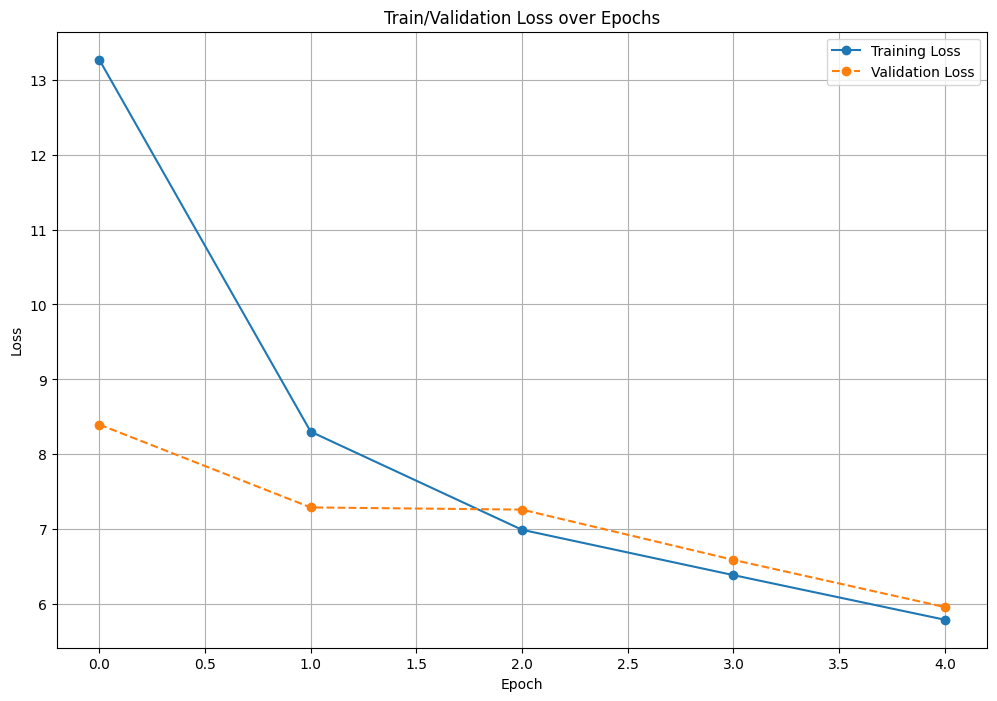

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(history)

plt.figure(figsize=(12, 8))

plt.plot(
	df['epoch'],
	df['train_loss'],
	label='Training Loss',
	marker='o',
	linestyle='-'
)

plt.plot(
	df['epoch'],
	df['test_loss'],
	label='Validation Loss',
	marker='o',
	linestyle='--'
)

plt.title('Train/Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
def draw_boxes(image, box, label, color_sample):

    image_with_boxes = image.copy()

    xmin, ymin, xmax, ymax = map(int, box)

    # Ensure correct indexing
    color = random.choice(color_sample)

    # Draw bounding box
    cv2.rectangle(image_with_boxes, (xmin, ymin), (xmax, ymax), color, 2)

    # Draw label text
    text = label
    text_size, _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 3)
    text_w, text_h = text_size

    # Adjust text position to prevent out-of-bounds
    ymin_text = max(ymin - text_h - 5, 0)

    # Background rectangle for text
    cv2.rectangle(image_with_boxes, (xmin, ymin_text-5), (xmin + text_w + 10, ymin), color, -1)

    # Put text on the image with white color for better visibility
    cv2.putText(
        image_with_boxes,
        text,
        (xmin + 5, ymin - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),  # White text
        2,
        cv2.LINE_AA,
    )

    return image_with_boxes

Loading pretrain weights


reinitializing detection head with 1 classes


Pothole-1/test/img-415_jpg.rf.2285ec32b9bdc584221e193dc135e3fd.jpg
Pothole-1/test/img-65_jpg.rf.9e22afc3c2cf318239352e43a97a7241.jpg
Pothole-1/test/img-343_jpg.rf.64b8e5ed7aa9153427c52de5812b3ab2.jpg
Pothole-1/test/img-394_jpg.rf.2182e193f33ed5bcce45df7df27032f7.jpg
Pothole-1/test/img-461_jpg.rf.c8f397ea98b554fde90a8fa53d876fa0.jpg
Pothole-1/test/img-343_jpg.rf.64b8e5ed7aa9153427c52de5812b3ab2.jpg
Pothole-1/test/img-68_jpg.rf.c8886ded10d01454f789376e4234ae74.jpg
Pothole-1/test/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg
Pothole-1/test/img-536_jpg.rf.a0b5c2d9388b4cb55785d5fa9e198a5c.jpg
Pothole-1/test/img-430_jpg.rf.f23ac782ee062c81370384e3ea211b5d.jpg
Pothole-1/test/img-294_jpg.rf.a16953e9091e3eecfc338ed3044ef294.jpg
Pothole-1/test/img-245_jpg.rf.1c9b49a366bda1cf64dbfac2a946cd38.jpg
Pothole-1/test/img-344_jpg.rf.dd4eebb8836b8efe2a2cce77d61349b7.jpg
Pothole-1/test/img-300_jpg.rf.6b7b035dff1cda092ce3dc22be8d0135.jpg
Pothole-1/test/img-245_jpg.rf.1c9b49a366bda1cf64dbfac2a946cd38.j

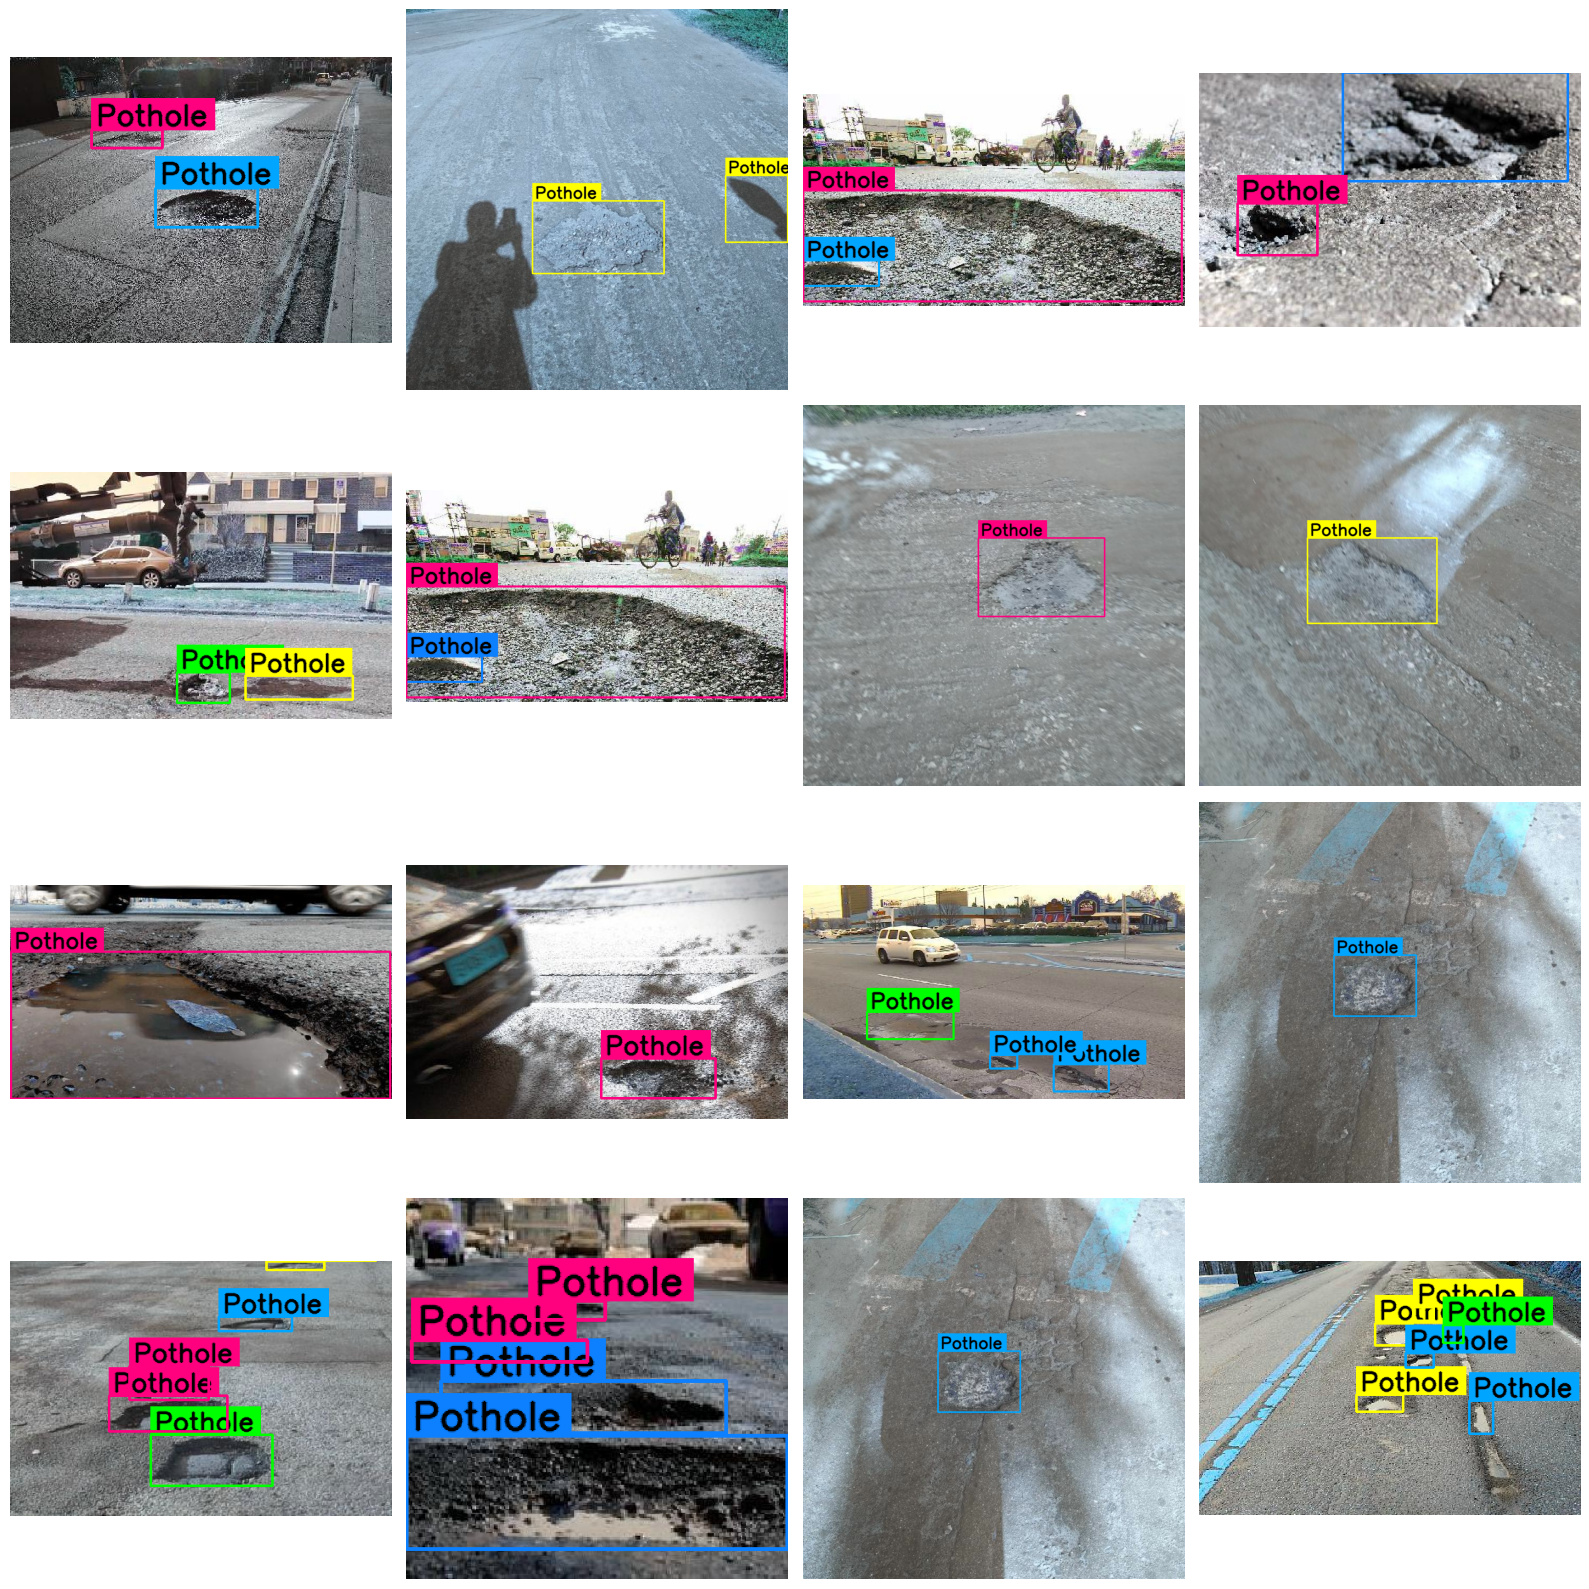

In [15]:
import cv2
import matplotlib.pyplot as plt
import os
import random
from rfdetr import RFDETRBase

# Initialize trained model
model = RFDETRBase(pretrain_weights='output/checkpoint.pth')


# Test images directory
test_images_dir = 'Pothole-1/test'

color_sample = [
    (12, 128, 255),   # Orange-ish
    (255, 0, 127),    # Pink
    (0, 255, 0),      # Green
    (255, 255, 0),    # Cyan
    (0, 165, 255)     # Blue-ish
]

class_names = ['bg','Pothole']

# Get list of test images (max 16)
image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)
    print(img_path)

    # Run inference
    preds = model.predict(image)  # Assuming image can be passed directly
    # print(preds)

    # Loop over detections
    for box, confi, id in zip(preds.xyxy, preds.confidence, preds.class_id):
        # if confi > 0.8:
        # print(id)
        # label = '0'
        label = class_names[id]
        image = draw_boxes(image, box, label, color_sample)

    # Plot
    ax[idx].imshow(image)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
